In [1]:
#Importing and installing all packages needed
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
#Allowing Google Drive access
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Loading dataset
path = '/content/drive/MyDrive/Colab Notebooks/00. Hard Drive/07. MSiA420 PA2 Project/data/'
df = pd.read_csv(path + 'harddrive.csv')
df.shape

(3179295, 95)

In [4]:
df.columns

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'smart_1_normalized', 'smart_1_raw', 'smart_2_normalized',
       'smart_2_raw', 'smart_3_normalized', 'smart_3_raw',
       'smart_4_normalized', 'smart_4_raw', 'smart_5_normalized',
       'smart_5_raw', 'smart_7_normalized', 'smart_7_raw',
       'smart_8_normalized', 'smart_8_raw', 'smart_9_normalized',
       'smart_9_raw', 'smart_10_normalized', 'smart_10_raw',
       'smart_11_normalized', 'smart_11_raw', 'smart_12_normalized',
       'smart_12_raw', 'smart_13_normalized', 'smart_13_raw',
       'smart_15_normalized', 'smart_15_raw', 'smart_22_normalized',
       'smart_22_raw', 'smart_183_normalized', 'smart_183_raw',
       'smart_184_normalized', 'smart_184_raw', 'smart_187_normalized',
       'smart_187_raw', 'smart_188_normalized', 'smart_188_raw',
       'smart_189_normalized', 'smart_189_raw', 'smart_190_normalized',
       'smart_190_raw', 'smart_191_normalized', 'smart_191_raw',
       'smart_1

#Data Analysis

In [5]:
#Finding the range of dates
print('Start date of data: ', min(df['date']))
print('End date of data: ', max(df['date']))

Start date of data:  2016-01-01
End date of data:  2016-04-29


0    0.999932
1    0.000068
Name: failure, dtype: float64

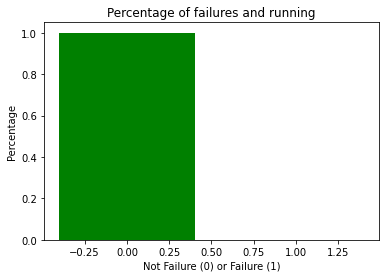

In [6]:
#Finding if there is class imbalance
class_imb = pd.DataFrame(df['failure'].value_counts(normalize = True)).reset_index()
class_imb.columns = ['Failure', 'Percentage']
plt.bar(class_imb['Failure'], class_imb['Percentage'], label=class_imb['Failure'], color = ['green','red'])
plt.xlabel('Not Failure (0) or Failure (1)')
plt.ylabel('Percentage')
plt.title('Percentage of failures and running')

df['failure'].value_counts(normalize = True)

In [7]:
#Number of failed drives
len(df.loc[df.failure == 1]['serial_number'].unique())

205

# Feature Selection

In [8]:
#TO model remaining useful life (based on Amram et al- Interpretable predictive maintenance for hard drives)
#Step 1 - Finding the failed hard drives
harddrive_failed = df.loc[df.failure==1]['serial_number']

df_analysis = df.loc[df.serial_number.isin(harddrive_failed)]
df_analysis["end_date"] = df_analysis.groupby("serial_number")['date'].transform("max")

import datetime
df_analysis["end_date"] = pd.to_datetime(df_analysis["end_date"])
df_analysis["date"] = pd.to_datetime(df_analysis["date"])

df_analysis["useful_life"] = (df_analysis["end_date"] - df_analysis["date"])
df_analysis

<ipython-input-8-ab51c5e1caf4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis["end_date"] = df_analysis.groupby("serial_number")['date'].transform("max")
<ipython-input-8-ab51c5e1caf4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis["end_date"] = pd.to_datetime(df_analysis["end_date"])
<ipython-input-8-ab51c5e1caf4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw,end_date,useful_life
376,2016-01-01,Z300ZST1,ST4000DM000,1.976651e-311,0,120,240872800,NaN,NaN,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-17,16 days
1657,2016-01-01,9VY8TCAV,ST3160318AS,7.907120e-313,0,111,38605541,NaN,NaN,97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-09,99 days
1895,2016-01-01,W300BG0H,ST4000DM000,1.976651e-311,0,118,190147064,NaN,NaN,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-18,108 days
2900,2016-01-01,W300J6FX,ST4000DM000,1.976651e-311,0,115,85258376,NaN,NaN,92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-09,99 days
3204,2016-01-01,Z3014A4S,ST4000DM000,1.976651e-311,0,116,101976792,NaN,NaN,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-10,9 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084227,2016-04-28,W0Q6KWV8,ST320LT007,1.581370e-312,1,117,147958432,NaN,NaN,98,...,1.0,358677046.0,1.0,164262565.0,100.0,0.0,NaN,NaN,2016-04-28,0 days
3100634,2016-04-28,S300XP36,ST4000DM000,1.976651e-311,1,117,146527232,NaN,NaN,98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-28,0 days
3105860,2016-04-28,W300T2RC,ST4000DM000,1.976651e-311,1,117,144495808,NaN,NaN,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-28,0 days
3136939,2016-04-29,Z302A13D,ST4000DM000,1.976651e-311,1,119,223384952,NaN,NaN,97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-29,0 days


Text(0, 0.5, 'Number of Failures')

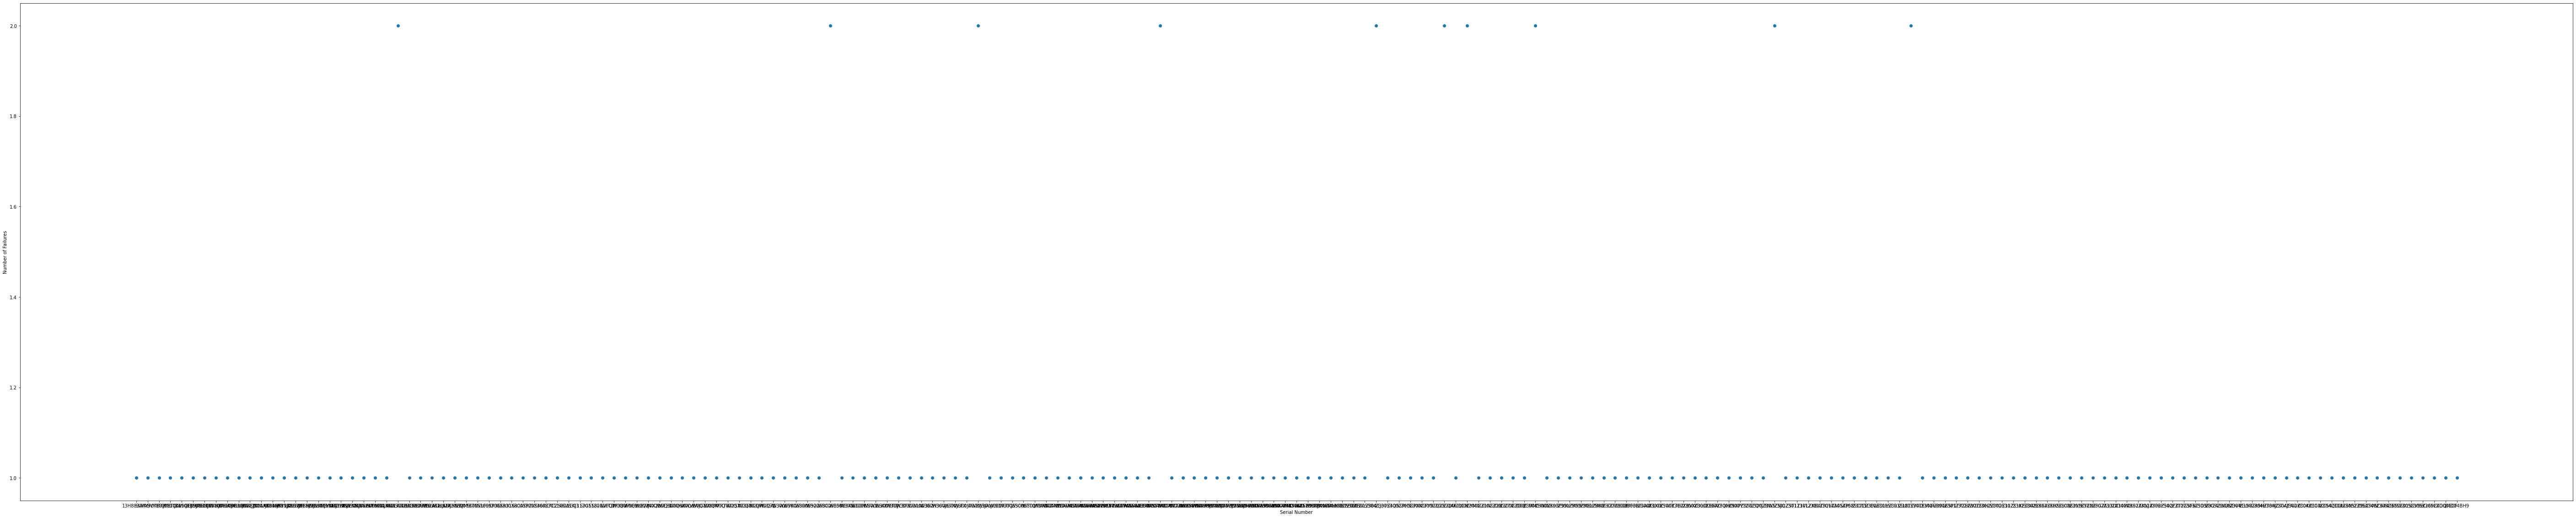

In [9]:
#Data Analysis continued after dataset is filtered to include only those that failed
fail_per_serial_number = df_analysis.groupby('serial_number').agg({'failure':'sum'}).reset_index()
plt.figure(figsize=(100, 20))
plt.scatter(fail_per_serial_number.serial_number, fail_per_serial_number.failure)
plt.xlabel('Serial Number')
plt.ylabel('Number of Failures')


In [10]:
#Drop columns with NAs
df_analysis.dropna(axis = 1, inplace=True)
print(df_analysis.shape)
df_analysis.isna().sum()

(5490, 35)


/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


date                    0
serial_number           0
model                   0
capacity_bytes          0
failure                 0
smart_1_normalized      0
smart_1_raw             0
smart_3_normalized      0
smart_3_raw             0
smart_4_normalized      0
smart_4_raw             0
smart_5_normalized      0
smart_5_raw             0
smart_7_normalized      0
smart_7_raw             0
smart_9_normalized      0
smart_9_raw             0
smart_10_normalized     0
smart_10_raw            0
smart_12_normalized     0
smart_12_raw            0
smart_188_raw           0
smart_194_normalized    0
smart_194_raw           0
smart_197_normalized    0
smart_197_raw           0
smart_198_normalized    0
smart_198_raw           0
smart_199_normalized    0
smart_199_raw           0
smart_240_raw           0
smart_241_raw           0
smart_242_raw           0
end_date                0
useful_life             0
dtype: int64

In [11]:
df_analysis.to_csv(path + 'df_analysis.csv')

In [12]:
#Dropping columns that are not needed
col_to_drop = ['date', 'end_date', 'model', 'serial_number', 'failure']
#it is okay to lose the information on model because this will be conveyed by capacity bytes
df_analysis.drop(col_to_drop, axis = 1, inplace = True)
print(df_analysis)

         capacity_bytes  smart_1_normalized  smart_1_raw  smart_3_normalized  \
376       1.976651e-311                 120    240872800                  91   
1657      7.907120e-313                 111     38605541                  97   
1895      1.976651e-311                 118    190147064                  91   
2900      1.976651e-311                 115     85258376                  92   
3204      1.976651e-311                 116    101976792                  91   
...                 ...                 ...          ...                 ...   
3084227   1.581370e-312                 117    147958432                  98   
3100634   1.976651e-311                 117    146527232                  98   
3105860   1.976651e-311                 117    144495808                  91   
3136939   1.976651e-311                 119    223384952                  97   
3139403   9.883284e-312                 100            0                 118   

         smart_3_raw  smart_4_normalize

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
#Checking if there are any more NAs across columns
df_analysis.isna().sum()

capacity_bytes          0
smart_1_normalized      0
smart_1_raw             0
smart_3_normalized      0
smart_3_raw             0
smart_4_normalized      0
smart_4_raw             0
smart_5_normalized      0
smart_5_raw             0
smart_7_normalized      0
smart_7_raw             0
smart_9_normalized      0
smart_9_raw             0
smart_10_normalized     0
smart_10_raw            0
smart_12_normalized     0
smart_12_raw            0
smart_188_raw           0
smart_194_normalized    0
smart_194_raw           0
smart_197_normalized    0
smart_197_raw           0
smart_198_normalized    0
smart_198_raw           0
smart_199_normalized    0
smart_199_raw           0
smart_240_raw           0
smart_241_raw           0
smart_242_raw           0
useful_life             0
dtype: int64

# Train-Test split

In [14]:
from sklearn.model_selection import train_test_split

y = df_analysis.useful_life.dt.days
X = df_analysis.drop(columns=['useful_life'], axis = 1)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelling

In [15]:
from sklearn.ensemble import RandomForestRegressor

RF_model=RandomForestRegressor(n_estimators=20,random_state=12)
RF_model.fit(train_X, train_y)

predictions = RF_model.predict(test_X)

In [16]:
from sklearn.metrics import r2_score
r2_score(test_y, predictions) #test R2

0.9590232551644526